In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('../datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
X = df.drop("charges", axis=1)
y = df["charges"]


In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
ridge_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # alpha = regularization strength
])


In [28]:
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', Ridge())])

In [29]:
y_pred = ridge_model.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 5800.46
R² Score: 0.78


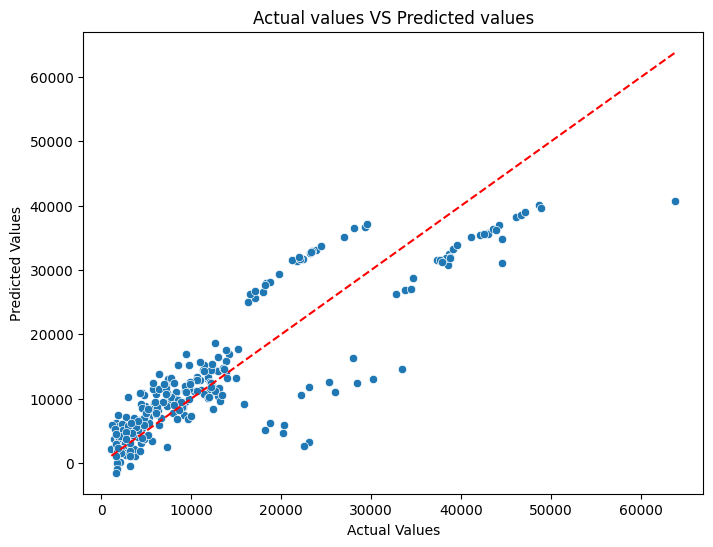

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y = y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual values VS Predicted values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')


In [34]:
alphas = [0.01, 0.1, 1.0, 10, 100]
for alpha in alphas:
    model = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', Ridge(alpha=alpha))
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"Alpha: {alpha} | RMSE: {rmse:.2f} | R²: {r2:.2f}")


Alpha: 0.01 | RMSE: 5796.32 | R²: 0.78
Alpha: 0.1 | RMSE: 5796.68 | R²: 0.78
Alpha: 1.0 | RMSE: 5800.46 | R²: 0.78
Alpha: 10 | RMSE: 5856.63 | R²: 0.78
Alpha: 100 | RMSE: 6983.46 | R²: 0.69


In [35]:
print("✅ We successfully built a Medical Insurance Prediction model using Ridge Regression.")
print("📌 We applied feature scaling, one-hot encoding, and model tuning.")
print("📊 RMSE and R² are used for evaluation.")

✅ We successfully built a Medical Insurance Prediction model using Ridge Regression.
📌 We applied feature scaling, one-hot encoding, and model tuning.
📊 RMSE and R² are used for evaluation.
